# Problem Statement:-

Predicting the percentage of marks of a student based on the number of study hours using Supervised Machine Learning Algorithm.

# Importing packages

In [164]:
# To work with dataframes
import pandas as pd

In [165]:
# To perform numerical operations
import numpy as np 

In [166]:
# For plotting graphs
import matplotlib.pyplot as plt

In [167]:
# For running regression
import statsmodels.api as sm

In [168]:
# To visualise data
import seaborn as sns 

# Setting dimensions for plot

In [169]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})

# Reading the data file

In [170]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Creating copy

In [171]:
Original_data = data.copy()

It is necessary to create a copy of original data so that it remains unaffected.

# Structure of data

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


It has been observed that there are no missing values in the dataset and the DataType is either integer or float.

# Summarizing data

In [173]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing parameters

# Hours

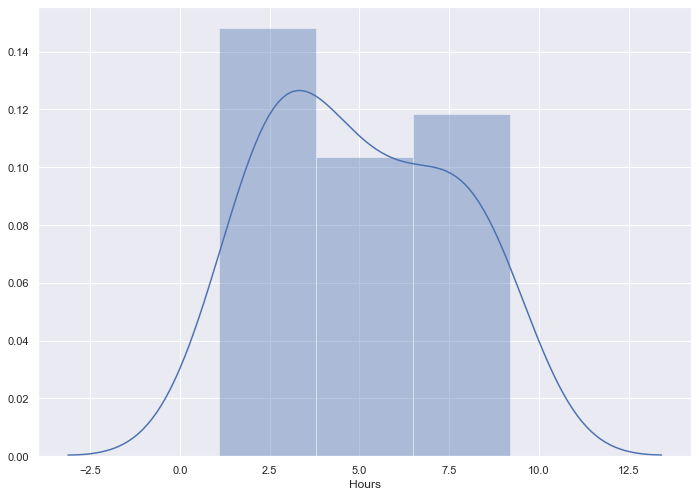

In [174]:
sns.distplot(data['Hours'])

It can be seen from the above plot that students with 2.5 study hours age are high in frequency.

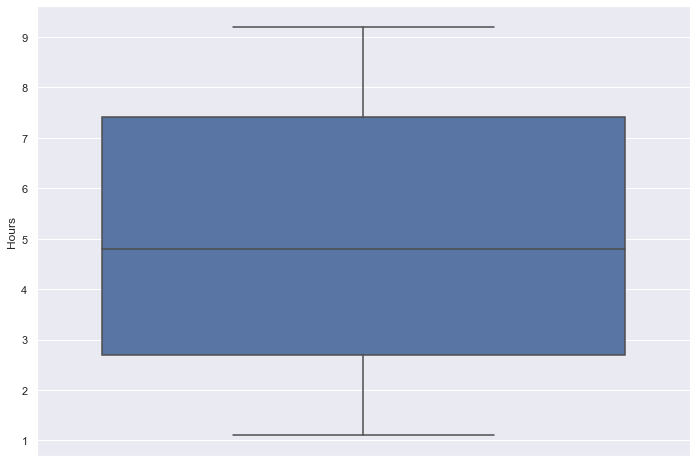

In [175]:
sns.boxplot(y = data['Hours'])

# Scores

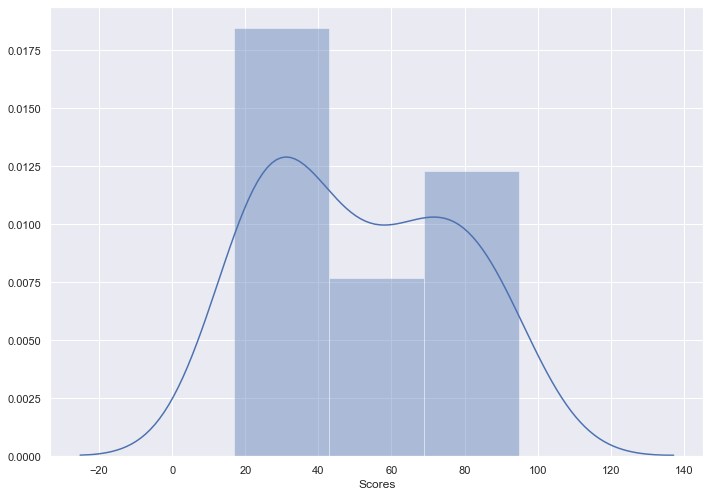

In [176]:
sns.distplot(data['Scores'])

It can be seen from the above plot that students with scores 20-40 are high in frequency.

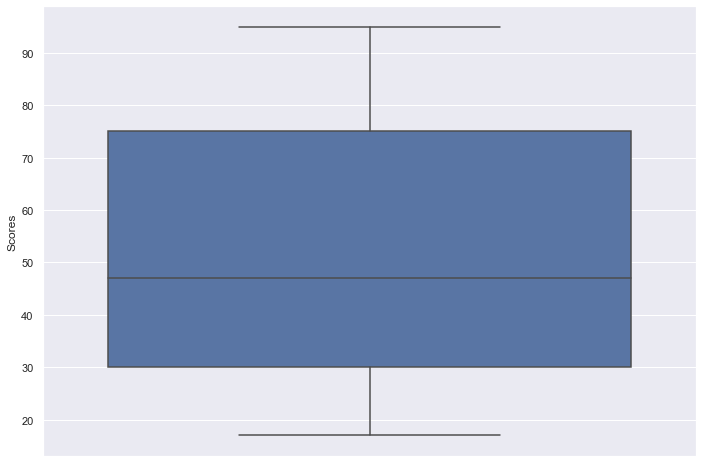

In [177]:
sns.boxplot(y = data['Scores'])

# Hours vs Scores

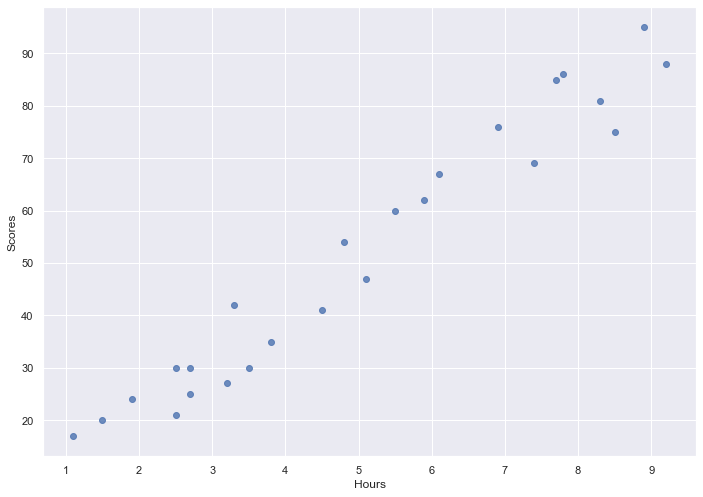

In [178]:
sns.regplot(x='Hours', y='Scores', scatter=True, fit_reg=False, data=data)

It can be seen from the above plot that as the number of study hours increases, the percentage of marks of a student also increases.

# Building Linear Regression Model

# Importing necessary libraries

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
from sklearn.linear_model import LinearRegression

In [181]:
from sklearn.metrics import mean_squared_error

# Separating input and output features

In this Supervised Linear Regression model, we have to predict the percentage of marks of an student based on the number of study hours.

Therefore, percentage of marks of a student is taken as Dependent Variable and number of study hours is taken as Independent Variable.

In [182]:
x1 = data.iloc[:, :-1].values  
y1 = data.iloc[:, 1].values  

# Splitting data into test and train

In [183]:
X_train,X_test,y_train,y_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

In [184]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)


# Training the model

In [185]:
lgr = LinearRegression(fit_intercept = True)
lgr.fit(X_train,y_train)

print('Training Complete')

Training Complete


# Plotting the regression line

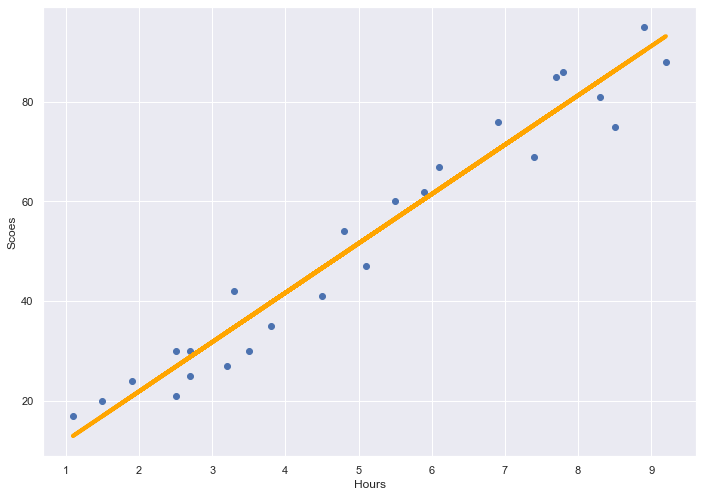

In [186]:
plt.scatter(x1,y1)
line = lgr.coef_*x1+lgr.intercept_
fig = plt.plot(x1, line, lw=4, c = 'orange', label = 'regression line')
plt.xlabel('Hours')
plt.ylabel('Scoes')
plt.show()

# Making predictions

In [187]:
y_pred = lgr.predict(X_test)
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [188]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [189]:
hours = 9.25
own_pred = lgr.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the model performance

In [190]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root mean square error = {}".format(rmse))

Root mean square error = 4.6474476121003665


In [191]:
r2_test = lgr.score(X_test,y_test)
r2_train = lgr.score(X_train,y_train)
print("R^2 test = {}".format(r2_test))
print("R^2 train = {}".format(r2_train))

R^2 test = 0.9454906892105356
R^2 train = 0.9515510725211553
